In [1]:
import pandas as pd 
import datetime 
pd.options.display.max_rows = 100

In [73]:
df = pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-total-announced-deaths-23-May-2020.xlsx", sheet_name="Tab4 Deaths by trust", skiprows=15, usecols="B:EA")
cols = list(df.columns)
cols = [c for c in cols if "Unnamed:" not in str(c)]
df = df[cols]

df = df.loc[:, "NHS England Region":"Total"]
df = df.iloc[2:, :]



dt_cols = [c for c in cols if type(c) == datetime.datetime]
other_cols = [c for c in cols if type(c) != datetime.datetime]

df = df.melt(id_vars = other_cols, value_vars=dt_cols)


df = df.sort_values(["Name", "variable"])
df["rs"] = df.groupby('Name')['value'].rolling(7).sum().reset_index(0,drop=True)
df.head(20)




,NHS England Region,Code,Name,Up to 01-Mar-20,Awaiting verification,Total,variable,value,rs
101,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-01,0.0,NaN
319,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-02,0.0,NaN
537,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-03,0.0,NaN
755,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-04,0.0,NaN
973,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-05,0.0,NaN
1191,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-06,0.0,NaN
1409,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-07,0.0,0.0
1627,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-08,0.0,0.0
1845,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-09,0.0,0.0
2063,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-10,0.0,0.0


In [82]:
len(df)

18094

In [74]:
import altair as alt

f1 = df["Name"].str.lower().str.contains("oxford university")
f2 = df["Name"].str.lower().str.contains("west hertfordshire")
f3 = df["Name"].str.lower().str.contains("cambridge university")

df.loc[f1|f2|f3, "highlight"] = "yes"
df.loc[~(f1|f2|f3), "highlight"] = "no"

In [75]:
df2 = df[f1|f2|f3]


,NHS England Region,Code,Name,Up to 01-Mar-20,Awaiting verification,Total,variable,value,highlight,rolling_sum,rs
101,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-01,0.0,no,0.0,NaN
319,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-02,0.0,no,0.0,NaN
537,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-03,0.0,no,31.0,NaN
755,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-04,0.0,no,0.0,NaN
973,North East And Yorkshire,RCF,AIREDALE NHS FOUNDATION TRUST,0.0,0.0,100.0,2020-03-05,0.0,no,7.0,NaN


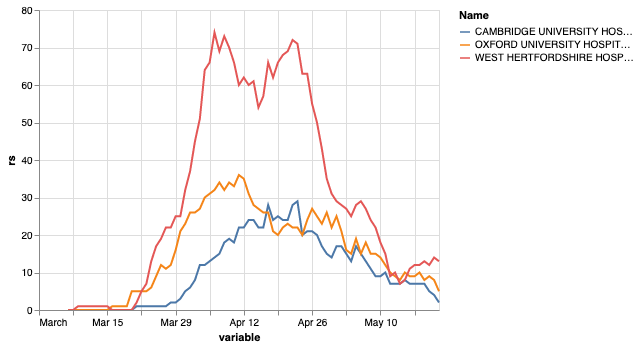

In [80]:
alt.Chart(df2).mark_line().encode(
    x='variable',
    y='rs',
    color='Name',
    tooltip=['Name', "variable", "rs"]
)

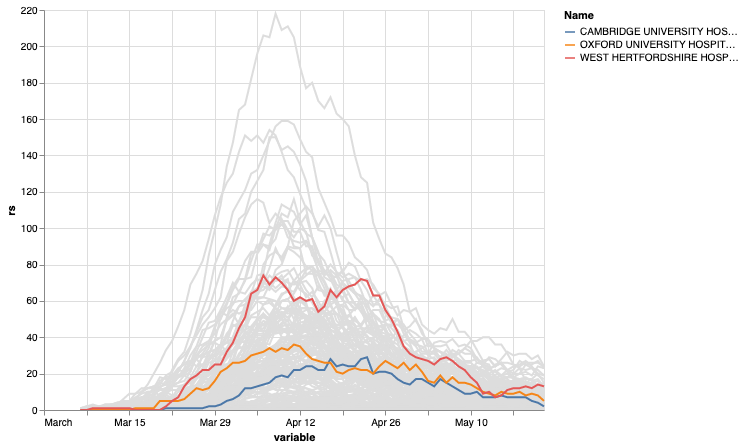

In [102]:
alt.data_transformers.enable('json')
c1 = alt.Chart(df).mark_line().encode(
    x='variable',
    y='rs',
    color=alt.Color('Name',  scale=None),
    tooltip=['Name', "variable", "rs"]
)

c2 = alt.Chart(df2).mark_line().encode(
    x='variable',
    y='rs',
    color='Name',
    tooltip=['Name', "variable", "rs"]
)

(c1 + c2).properties(height=400, width=500)